In [20]:
import pandas as pd
import numpy as np
import nibabel as nib
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt

In [21]:
# Get atlas IDs for sorting
atlasdf = pd.read_csv('/BICNAS2/tuominen/trsnrm/scripts/data/glasserlabels.csv', header=0)
# restrict to 0-180
atlasdf = atlasdf[0:180]
# assign label
atlasdf = atlasdf.assign(region=atlasdf.full_label.apply(lambda x: x.split('_')[0]))
# remove full label
atlasdf = atlasdf[['regionID', 'region']]

In [22]:
atlasdf.region.unique()

array(['V1', 'MST', 'V6', 'V2', 'V3', 'V4', 'V8', '4', '3b', 'FEF', 'PEF',
       '55b', 'V3A', 'RSC', 'POS2', 'V7', 'IPS1', 'FFC', 'V3B', 'LO1',
       'LO2', 'PIT', 'MT', 'A1', 'PSL', 'SFL', 'PCV', 'STV', '7Pm', '7m',
       'POS1', '23d', 'v23ab', 'd23ab', '31pv', '5m', '5mv', '23c', '5L',
       '24dd', '24dv', '7AL', 'SCEF', '6ma', '7Am', '7PL', '7PC', 'LIPv',
       'VIP', 'MIP', '1', '2', '3a', '6d', '6mp', '6v', 'p24pr', '33pr',
       'a24pr', 'p32pr', 'a24', 'd32', '8BM', 'p32', '10r', '47m', '8Av',
       '8Ad', '9m', '8BL', '9p', '10d', '8C', '44', '45', '47l', 'a47r',
       '6r', 'IFJa', 'IFJp', 'IFSp', 'IFSa', 'p9-46v', '46', 'a9-46v',
       '9-46d', '9a', '10v', 'a10p', '10pp', '11l', '13l', 'OFC', '47s',
       'LIPd', '6a', 'i6-8', 's6-8', '43', 'OP4', 'OP1', 'OP2-3', '52',
       'RI', 'PFcm', 'PoI2', 'TA2', 'FOP4', 'MI', 'Pir', 'AVI', 'AAIC',
       'FOP1', 'FOP3', 'FOP2', 'PFt', 'AIP', 'EC', 'PreS', 'H', 'ProS',
       'PeEc', 'STGa', 'PBelt', 'A5', 'PHA1', 'PHA3'

In [23]:
results = pd.read_csv('/BICNAS2/tuominen/trsnrm/scripts/plot_gc_vals.csv', index_col=None, names=['region','alff'], header=0)
left = results.loc[results.region.str.contains('Left')]
left = left.assign(region=left['region'].str.split('_').str[1])
right = results.loc[results.region.str.contains('Right')]
right = right.assign(region=right['region'].str.split('_').str[1])

In [24]:
results_left  = left.merge(atlasdf, on=['region']).sort_values('regionID')
results_right  = right.merge(atlasdf, on=['region']).sort_values('regionID')

In [25]:
from surfplot import Plot
from neuromaps.datasets import fetch_fslr
from neuromaps import images

In [26]:
# Fetch fsaverage
surfaces = fetch_fslr(density='32k')
lh, rh = surfaces['inflated']
lhatlas, rhatlas = images.dlabel_to_gifti('/BICNAS2/tuominen/trsnrm/scripts/data/Q1-Q6_RelatedParcellation210.CorticalAreas_dil_Colors.32k_fs_LR.dlabel.nii')
atlas = {'left':lhatlas, 'right':rhatlas}

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [27]:
p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2, layout='row', brightness=0.6)
pic = p.build()

2024-10-22 18:50:30.644 ( 179.447s) [    73DCCC12B1C0] vtkPythonAlgorithm.cxx:97     ERR| vtkPythonAlgorithm (0x56ee8e17e490): Failure when calling method: "ProcessRequest":


TypeError: SetCells argument 2: method requires a VTK object

2024-10-22 18:50:30.716 ( 179.519s) [    73DCCC12B1C0]       vtkExecutive.cxx:729    ERR| vtkCompositeDataPipeline (0x56ee8daea460): Algorithm vtkPythonAlgorithm (0x56ee8e17e490) returned failure for request: vtkInformation (0x56ee8e1c4c50)
  Debug: Off
  Modified Time: 1313
  Reference Count: 2
  Registered Events: (none)
  Request: REQUEST_DATA
  FROM_OUTPUT_PORT: 0
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0


2024-10-22 18:50:30.732 ( 179.534s) [    73DCCC12B1C0] vtkPythonAlgorithm.cxx:97     ERR| vtkPythonAlgorithm (0x56ee8e1c3bf0): Failure when calling method: "ProcessRequest":


TypeError: SetCells argument 2: method requires a VTK object

2024-10-22 18:50:30.801 ( 179.604s) [    73DCCC12B1C0]       vtkExecutive.cxx:729    ERR| vtkCompositeDataPipeline (0x56ee8e1c3320): Algorithm vtkPythonAlgorithm (0x56ee8e1c3bf0) returned failure for request: vtkInformation (0x56ee8dd96200)
  Debug: Off
  Modified Time: 1478
  Reference Count: 2
  Registered Events: (none)
  Request: REQUEST_DATA
  FROM_OUTPUT_PORT: 0
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0




TypeError: SetTable argument 1: method requires a VTK object

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


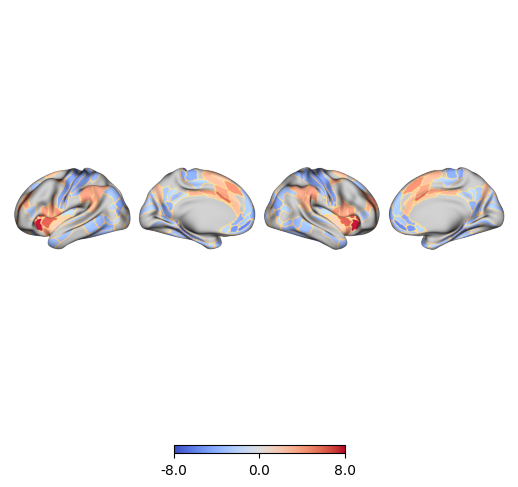

In [67]:
for a in atlas.keys():
    atlas[a].darrays[0].data.dtype = 'float32'
    unique_values = np.unique(atlas[a].darrays[0].data)
    # Exclude the medial wall [0]
    for item, val in enumerate(unique_values[1:], start=0):
        indices = np.where(atlas[a].darrays[0].data == val)
        atlas[a].darrays[0].data[indices] = sigtvals[item]

# Generate plot
p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2, layout='row', brightness=0.6)
p.add_layer(atlas, cbar=True, cmap='coolwarm', color_range=(-8,8))
p.add_layer(atlas, cbar=False, cmap='copper', color_range=(-1,1), as_outline=True)
pic = p.build()
plt.tight_layout()
pic.savefig('/media/mrspecial/MrSpecialExtra/raclo/scripts/figures/fmri_n50.png', dpi=900, transparent=False)

In [103]:
# Get atlas IDs for sorting
atlasdf = pd.read_csv('/media/mrspecial/MrSpecialExtra/raclo/scripts/data/tianlabels.csv', header=0)
# restrict to 0-180
atlasdf = atlasdf[0:16]
# assign label
atlasdf = atlasdf.assign(region=atlasdf.full_label.str[:-3])
# remove full label
atlasdf = atlasdf[['regionID', 'region']]

In [104]:
results_filt = results.loc[(results.run == 'all') & (results.ctx_region == 'subcortex') & (results.contrast == 'csdelta')]

In [105]:
results_sorted  = results_filt.merge(atlasdf, on=['region']).sort_values('regionID')

In [106]:
sigtvals = results_sorted.apply(lambda r: r['t_value'] if r['is_significant'] else 0, axis=1).to_list()

In [107]:
results_sorted

,run,contrast,region,ctx_region,t_value,p_value,corrected_p_value,is_significant,regionID
8,all,csdelta,aHIP,subcortex,-5.456346,8.706060e-07,1.421990e-05,True,1
14,all,csdelta,pHIP,subcortex,-3.564768,7.013224e-04,2.114757e-03,True,2
10,all,csdelta,lAMY,subcortex,-3.663823,5.112322e-04,1.727612e-03,True,3
11,all,csdelta,mAMY,subcortex,-6.298755,3.274587e-08,9.168844e-07,True,4
3,all,csdelta,THA-DP,subcortex,-2.264800,2.697410e-02,4.850388e-02,True,5
5,all,csdelta,THA-VP,subcortex,0.922908,3.595765e-01,4.377453e-01,False,6
4,all,csdelta,THA-VA,subcortex,2.891924,5.249575e-03,1.169223e-02,True,7
2,all,csdelta,THA-DA,subcortex,0.379309,7.057342e-01,7.558684e-01,False,8
1,all,csdelta,NAc-shell,subcortex,-2.321177,2.352609e-02,4.309453e-02,True,9
0,all,csdelta,NAc-core,subcortex,0.545541,5.873081e-01,6.540476e-01,False,10


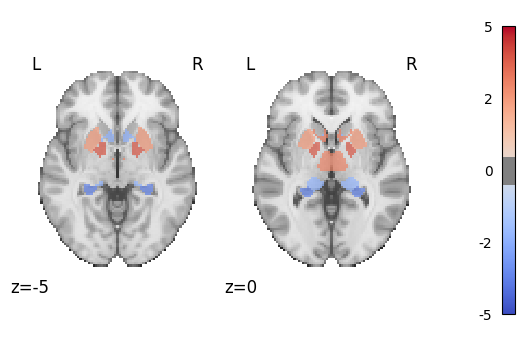

In [125]:
atlasfile = '/media/mrspecial/MrSpecialExtra/raclo/atlases/Tian_Subcortex_S2_3T.nii'
temp = nib.load(atlasfile)
sub_atlas = temp.get_fdata()
unique_values = np.unique(sub_atlas)
subatlas_lr = {'left':unique_values[1:17], 'right':unique_values[17:]}
for a in subatlas_lr.keys():
    for item, val in enumerate(subatlas_lr[a], start=0):
        indices = np.where(sub_atlas == val)
        sub_atlas[indices] = sigtvals[item]
subatlas_t = nib.Nifti1Image(sub_atlas, temp.affine)
tian_parc = plotting.plot_roi(subatlas_t, cut_coords=[-5,0], colorbar = True,
                              vmin = -5, vmax =5, cmap = 'coolwarm', display_mode='z',
                              black_bg=False, draw_cross=False, figure=1, dim=0, annotate=True)
plt.savefig('/media/mrspecial/MrSpecialExtra/raclo/scripts/figures/fmri_subcortex_n50.png', dpi=900, bbox_inches='tight')